In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, col, avg
from pyspark.sql.types import DoubleType
spark = SparkSession.builder.getOrCreate()

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np

In [3]:
data1 = spark.read.format("csv").option("header", "true").load("C:/Users/s535981/Downloads/BigDataFinalProject/IMDB Top 250 Movies.csv")
data2 = spark.read.format("csv").option("header", "true").load("C:/Users/s535981/Downloads/BigDataFinalProject/movies_initial.csv")
data3 = spark.read.format("csv").option("header", "true").load("C:/Users/s535981/Downloads/BigDataFinalProject/movies.csv")

In [5]:
joined_data = data1.join(data2, ["budget"]).join(data3, ["budget"])

In [6]:
selected_data = joined_data.select("director", col("budget").cast(DoubleType())).filter(col("budget").isNotNull())

filtered_data = selected_data.filter(col("budget") > 0)

grouped_data = filtered_data.groupBy("director", "budget").agg(count("*").alias("count"))

In [7]:
sorted_data = grouped_data.orderBy("director", "budget")

sorted_data.show()

+--------------------+---------+-----+
|            director|   budget|count|
+--------------------+---------+-----+
|      Asghar Farhadi| 500000.0|   14|
|        Billy Wilder|3000000.0|   75|
|     Charles Chaplin|1500000.0|   56|
|Clyde Bruckman,Bu...| 750000.0|    3|
|         Danny Boyle|1500000.0|   28|
|          David Lean|3000000.0|   75|
|         David Lynch|5000000.0|  134|
|Francis Ford Coppola|    1.3E7|   93|
|        George Lucas|    1.1E7|   72|
|    Gillo Pontecorvo| 800000.0|   12|
|  Giuseppe Tornatore|5000000.0|  134|
|      Irvin Kershner|    1.8E7|  115|
|       James Cameron|6400000.0|    5|
|  Jean-Pierre Jeunet|    1.0E7|  416|
|Joel Coen,Ethan C...|7000000.0|   91|
|           John Ford| 800000.0|   12|
|         John Huston|3000000.0|   75|
|    Lenny Abrahamson|    1.3E7|   93|
|     Martin Scorsese|    1.8E7|  115|
|        Milos Forman|3000000.0|   75|
+--------------------+---------+-----+
only showing top 20 rows



In [12]:
pandas_data = sorted_data.toPandas()

pandas_data.set_index("budget", inplace=True)

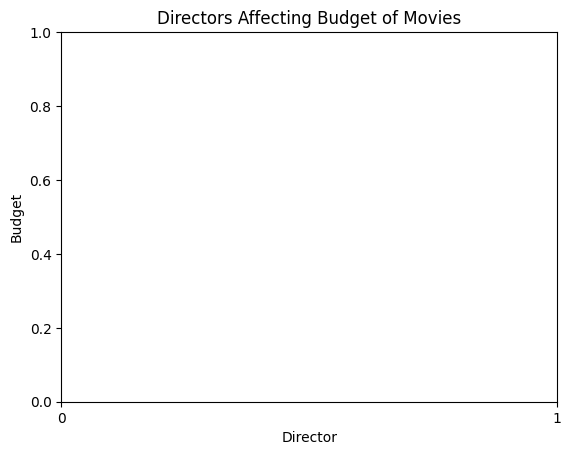

In [15]:
fig, ax = plt.subplots()
plt.title("Directors Affecting Budget of Movies")
ax.set_xlabel("Director")
ax.set_ylabel("Budget")
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()